In [ ]:
#Load Data
from tensorflow import keras

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Encoder
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [ ]:
#Decoder
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [ ]:
#Gabungkan Encoder-Decoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [ ]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                                  validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1422 - val_loss: 0.1067
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1025 - val_loss: 0.0972
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0966 - val_loss: 0.0935
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0936 - val_loss: 0.0914
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0918 - val_loss: 0.0903
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0906 - val_loss: 0.0891
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0896 - val_loss: 0.0884
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0888 - val_loss: 0.0875
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0881 - val_loss: 0.0870
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.087

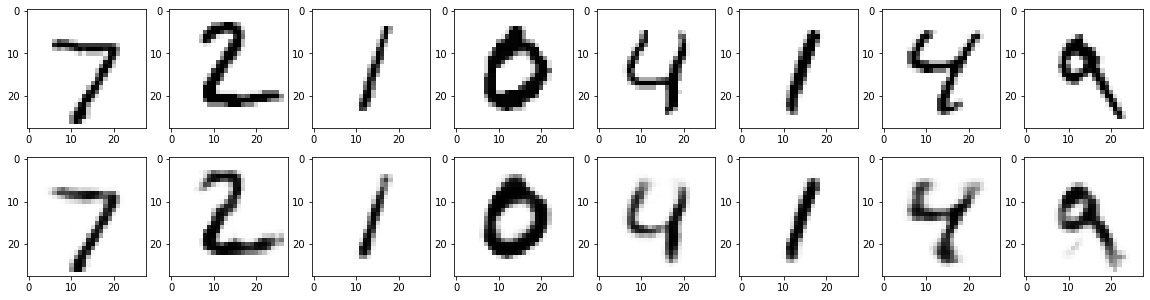

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  plt.imshow(x_test[i], cmap="binary")

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28, 28)), cmap="binary")

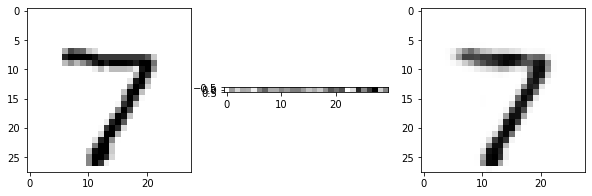

In [ ]:
i = 0 # change this number

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(x_test[i], cmap="binary")

plt.subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
plt.imshow(latent_vector, cmap="binary")

plt.subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
plt.imshow(pred[i], cmap="binary")